# **Cleaning and Combining Data**

## **Load and Merge Datasets**

In [2]:
import pandas as pd

df_calories = pd.read_csv("datasets/calories.csv")
df_exercise = pd.read_csv('datasets/exercise.csv')

print(df_calories.head())
print(df_exercise.head())

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8


In [29]:
df = pd.merge(df_exercise, df_calories, on="User_ID")
df.to_csv("datasets/cleaned_data.csv")
print(df.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


## **Data Cleaning**

In [4]:
print(df.isnull().sum())

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


In [6]:
print(df.describe())

            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     

In [7]:
df["Gender"] = df["Gender"].map({"male": 0, "female": 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [8]:
print(df.isnull().sum())
print(df.head())    

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


# **Exploratory Data Analysis (EDA)**

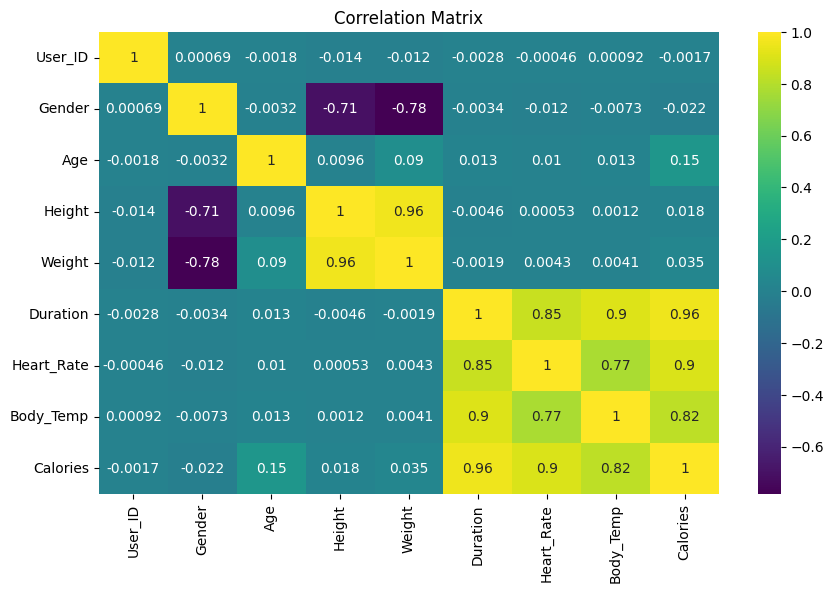

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

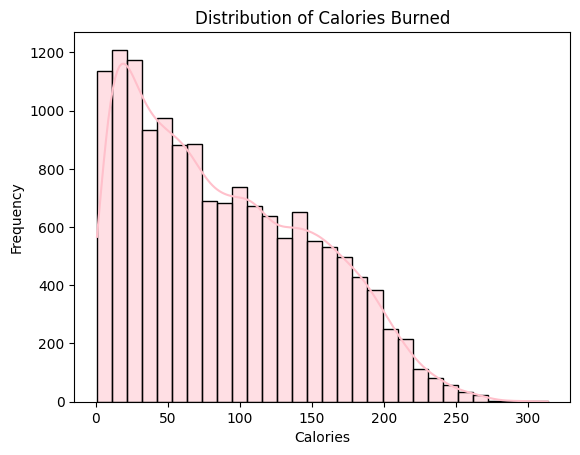

In [10]:
# Distribution of Calories
sns.histplot(df['Calories'], bins=30, kde=True, color='pink')
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# **Preparing Data for Modeling**

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["User_ID", "Calories"])
y = df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(X_train.head())

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
9839        0   37   179.0    77.0       7.0        81.0       39.5
9680        0   23   195.0    87.0      26.0       110.0       40.5
7093        0   33   181.0    77.0      12.0        88.0       40.1
11293       1   66   156.0    54.0       9.0        77.0       39.5
820         1   32   144.0    49.0       5.0        90.0       39.0


# **Building and Training Model**

## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score   

lr = LinearRegression()
lr.fit(X_train, y_train)

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).T
lr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
lr_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,126.945825,0.967162,131.995746,0.967294


## Random Forest Regression

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=200 ,max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame(["Random Forest", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,5.626231,0.998545,11.461686,0.99716


## **Model Comparison**

In [14]:
df_model = pd.concat([lr_results, rf_results], axis = 0).reset_index(drop=True)
df_model

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,126.945825,0.967162,131.995746,0.967294
1,Random Forest,5.626231,0.998545,11.461686,0.99716


Random Forgest Regression is better for this dataset as:
* It has lower MSE on both training and testing sets which gives more accurate predictions.
* Higher R2 Score shows that there is more variance in calories burned.
* It has more consistent generalization (no overfitting or underfitting)

# **Visualization of Prediciton results**

## Bar Plot to compare MSE and R2 scores

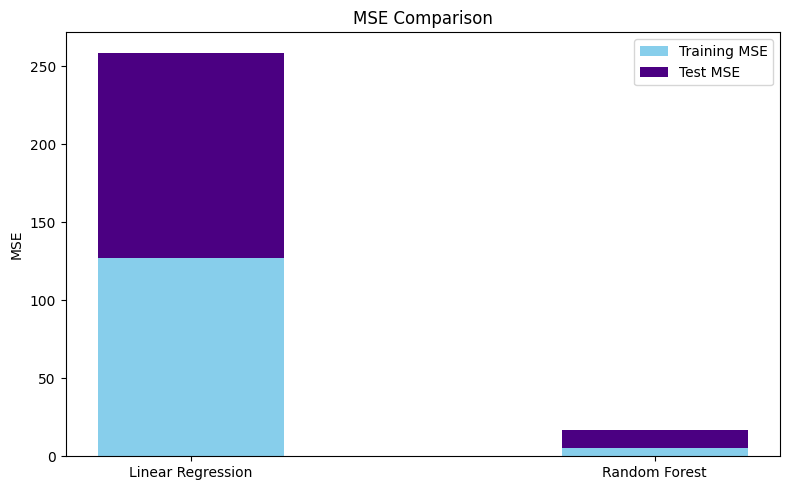

In [15]:
import numpy as np

comparison_df = pd.concat([lr_results, rf_results], ignore_index=True)
comparison_df[['Training MSE', 'Training R2', 'Test MSE', 'Test R2']] = comparison_df[['Training MSE', 'Training R2', 'Test MSE', 'Test R2']].astype(float)

models = comparison_df["Method"]

# MSE Plot
plt.figure(figsize=(8, 5))
plt.bar(models, comparison_df["Training MSE"], width=0.4, label="Training MSE", color="skyblue")
plt.bar(models, comparison_df["Test MSE"], width=0.4, label="Test MSE", color="indigo", bottom=comparison_df["Training MSE"])
plt.ylabel("MSE")
plt.title("MSE Comparison")
plt.legend()
plt.tight_layout()
plt.show()

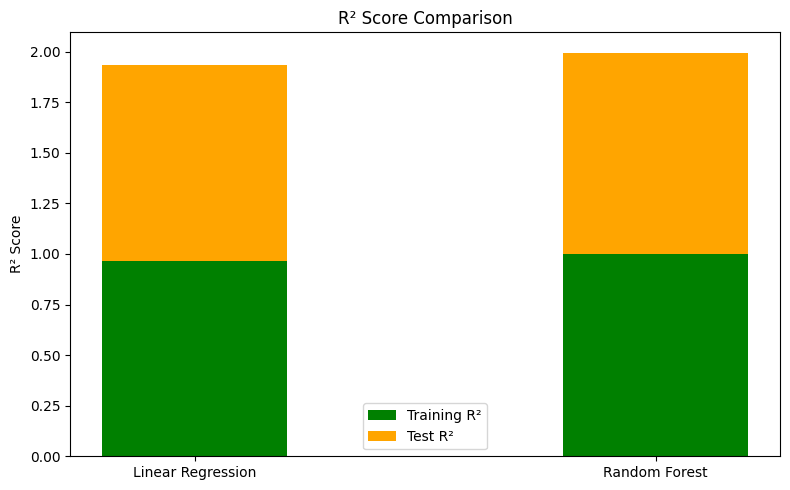

In [16]:
# R2 Score Plot
plt.figure(figsize=(8, 5))
plt.bar(models, comparison_df["Training R2"], width=0.4, label="Training R²", color="green")
plt.bar(models, comparison_df["Test R2"], width=0.4, label="Test R²", color="orange", bottom=comparison_df["Training R2"])
plt.ylabel("R² Score")
plt.title("R² Score Comparison")
plt.legend()
plt.tight_layout()
plt.show()

## Scatter plot: Actual vs Predicted Calories

#### Linear Regression

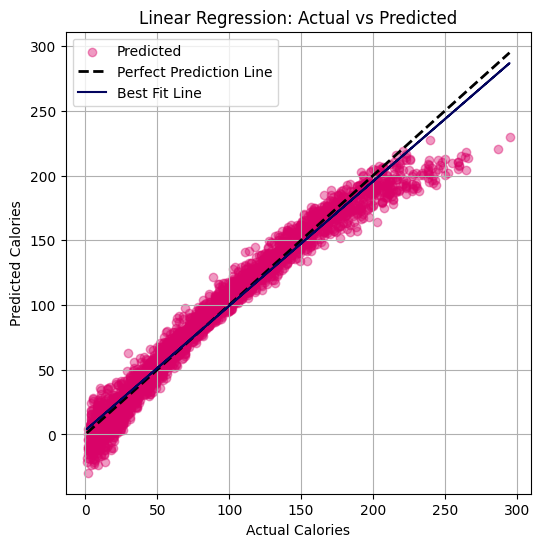

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_lr_test_pred, alpha=0.4, color="#D90368", label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
z1 = np.polyfit(y_test, y_lr_test_pred, 1)
p1 = np.poly1d(z1)
plt.plot(y_test, p1(y_test), color="#03045E", label="Best Fit Line")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


#### Random Forest Regression

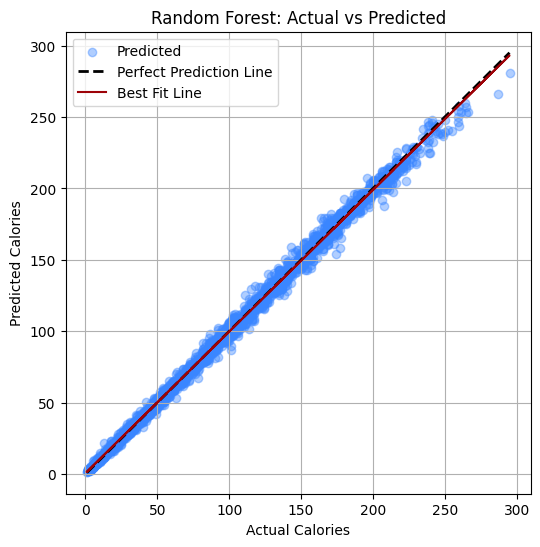

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_rf_test_pred, alpha=0.4, color="#3A86FF", label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
z2 = np.polyfit(y_test, y_rf_test_pred, 1)
p2 = np.poly1d(z2)
plt.plot(y_test, p2(y_test), color="#9D0208", label="Best Fit Line")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


#### Side-by-Side Comparison of models

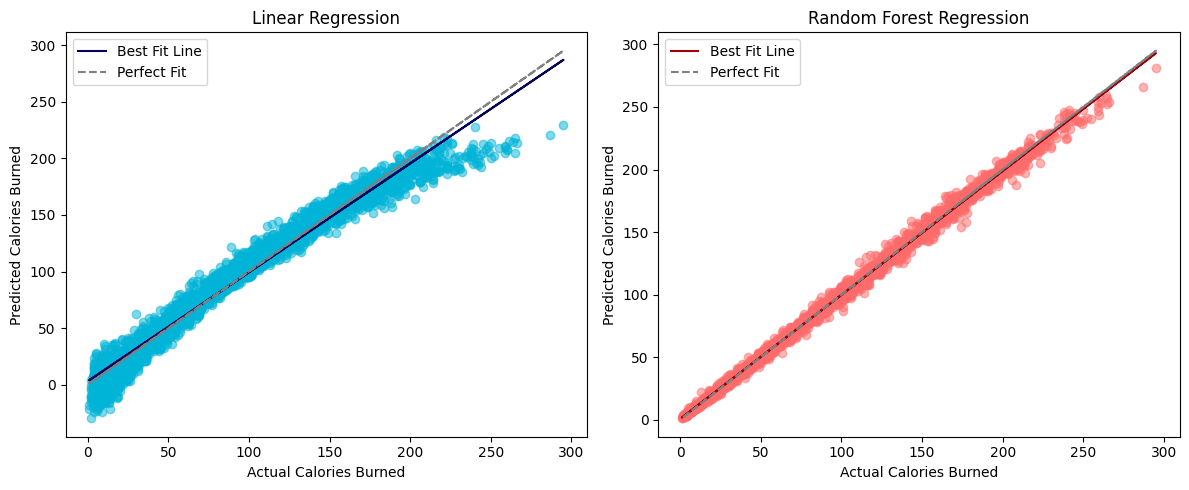

In [19]:
plt.figure(figsize=(12, 5))

# Scatter Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_lr_test_pred, alpha=0.5, color="#00B4D8")
z1 = np.polyfit(y_test, y_lr_test_pred, 1)
p1 = np.poly1d(z1)
plt.plot(y_test, p1(y_test), color="#03045E", label="Best Fit Line")
plt.plot(y_test, y_test, color="gray", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Linear Regression")
plt.legend()

# Scatter Plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_rf_test_pred, alpha=0.5, color="#FF6B6B")
z2 = np.polyfit(y_test, y_rf_test_pred, 1)
p2 = np.poly1d(z2)
plt.plot(y_test, p2(y_test), color="#9D0208", label="Best Fit Line")
plt.plot(y_test, y_test, color="gray", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Random Forest Regression")
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
import joblib as jb

jb.dump(rf, "calories_burned_model.pkl")

['calories_burned_model.pkl']